In [1]:
#The embedding method is not yet definite.

In [6]:
import pandas as pd
df = pd.read_csv('../api_fetcher/cleaned_abstracts.csv')
df

,abstracts
0,We modulated a solvent-mediated adduct for one...
1,The device performance is enhanced by doping a...
2,Lead halide perovskites have emerged as succes...
3,Several applications of perovskite solar cells...
4,High temperature stable inorganic CsPbX3 (X: I...
...,...
3364,Resonant semiconductor nanoparticles (NPs) tha...
3365,A rutile TiO2 nanodendrite array (3D-RTNDA) co...
3366,A perovskite solar cell with an inverted p–i–n...
3367,"Fullerene derivatives, especially after purpos..."


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import itertools
df_list = df['abstracts'].tolist()
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_list)

tfidf_matrix.shape


from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L12-v2')

/home/sjamshidi/.local/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [9]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [10]:
embeddings = model.encode(df_list, show_progress_bar=True)  # Returns a list of sentence embeddings

Batches:   0%|          | 0/106 [00:00<?, ?it/s]

In [11]:
embeddings.shape

(3369, 384)

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

num_clusters = 10  # Define how many clusters you want
clustering_model = KMeans(n_clusters=num_clusters, random_state=42)
clusters = clustering_model.fit_predict(embeddings)


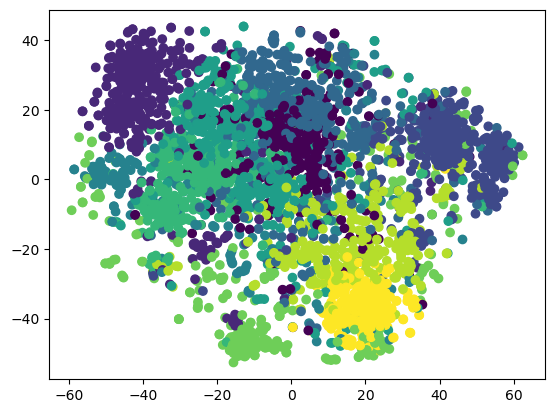

In [13]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1], c=clusters)
plt.show()